In [ ]:
# This compares [Fe/H] as retrieved by our pipeline, and as found by nSSPP

# Created 2021 Dec. 5 by E.S.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
stem = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/"

rrlfe_results_file = "bin/retrieved_vals_test_20211203.csv"
nsspp_results_file = "notebooks_for_development/data/nSSPP82.out"
stacy_results_file = "notebooks_for_development/data/tloggfeoh2.dat"
phase_82_file = "notebooks_for_development/data/phase82.dat"

In [25]:
df_rrlfe = pd.read_csv(stem + rrlfe_results_file)
df_nsspp = pd.read_csv(stem + nsspp_results_file, delim_whitespace=True, 
                       names=["name","teff","logg","feh_nsspp","feh_beers"])
df_stacy = pd.read_csv(stem + stacy_results_file, delim_whitespace=True)
df_phase_82 = pd.read_csv(stem + phase_82_file, delim_whitespace=True, 
                          names = ["SDSSname", "hjd", "Sesar phase", "Sesar_cycles", "period", "g ephemeris", 
                                   "g amplitude", "Sesar type", "Drake phase", "Drake cycles", "Drake period", 
                                   "Drake V ephemeris", "Drake V amp", "Drake type", 
                                   "Drake2013b chart period", 
                                   "Drake2013b chart amp", 
                                   "Drake2013b chart type", 
                                   "Abbas2014 period", 
                                   "Abbas2014 amp", 
                                   "Abbas2014 type", 
                                   "Catalina DR2 chart period", 
                                   "Catalina DR2 chart amp", 
                                   "Catalina DR2 chart type", 
                                   "Drake MLS chart period", 
                                   "Drake MLS chart amp", 
                                   "Drake MLS chart type"])

In [28]:
df_nsspp["name"].str.split("")

,name,teff,logg,feh_nsspp,feh_beers
SDSS,spec-0371-52078-0096h001,6792,4.069,-1.406,-1.496
SDSS,spec-0371-52078-0096h002,6194,2.520,-1.521,-1.521
SDSS,spec-0371-52078-0324h001,6350,3.605,-1.328,-1.328
SDSS,spec-0371-52078-0324h002,7105,4.523,-1.359,-1.359
SDSS,spec-0371-52078-0334h001,6356,3.360,-1.260,-1.540
...,...,...,...,...,...
SDSS,spec-3143-54772-0191h002,6472,3.115,-1.646,-1.756
SDSS,spec-3143-54772-0191h003,6459,3.220,-1.731,-1.850
SDSS,spec-3143-54772-0191h004,6653,3.973,-1.462,-1.560
SDSS,spec-3143-54772-0191h005,7491,4.615,-1.290,-1.658


In [46]:
# modify the right strings to compare among DataFrames

df_rrlfe["match_name"] = df_rrlfe["orig_spec_file_name"].str.split(".", expand = True, n=1)[0]
df_rrlfe["match_name"] = df_rrlfe["match_name"].str.replace("g", "h")

In [70]:
df_rrlfe = df_rrlfe.rename(columns={"feh_retrieved": "rrlfe_feh_retrieved", 
                         "err_feh_retrieved": "rrlfe_err_feh_retrieved",
                         "teff_retrieved": "rrlfe_teff_retrieved"})
df_nsspp = df_nsspp.rename(columns={"teff": "nsspp_teff"})

In [71]:
# merge them

df_merged = df_rrlfe.merge(df_nsspp, left_on="match_name", right_on="name")

In [72]:
df_merged.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning', 'rrlfe_feh_retrieved',
       'rrlfe_err_feh_retrieved', 'rrlfe_teff_retrieved', 'match_name', 'name',
       'nsspp_teff', 'logg', 'feh_nsspp', 'feh_beers'],
      dtype='object')

In [75]:
df_master = df_merged[["match_name", "rrlfe_feh_retrieved", "rrlfe_err_feh_retrieved", "rrlfe_teff_retrieved", "nsspp_teff", "feh_nsspp"]].copy()

In [77]:
df_master

,match_name,rrlfe_feh_retrieved,rrlfe_err_feh_retrieved,rrlfe_teff_retrieved,nsspp_teff,feh_nsspp
0,spec-0371-52078-0324h002,-1.601213,0.011885,6460.040964,7105,-1.359
1,spec-0371-52078-0334h001,-1.606166,0.014424,6041.973515,6356,-1.260
2,spec-0371-52078-0334h002,-1.348249,0.015164,6015.605941,6444,-1.074
3,spec-0372-52173-0430h001,-1.025199,0.015774,7635.673869,7359,-1.145
4,spec-0374-51791-0010h001,-1.653877,0.014905,5977.241759,6166,-1.732
...,...,...,...,...,...,...
89,spec-3112-54802-0315h002,-1.921881,0.013378,6023.715049,6307,-1.619
90,spec-3143-54772-0191h001,-1.982607,0.012147,6181.777141,6327,-1.762
91,spec-3143-54772-0191h003,-1.818772,0.012084,6376.034124,6459,-1.731
92,spec-3143-54772-0191h004,-1.556759,0.012018,6389.425498,6653,-1.462


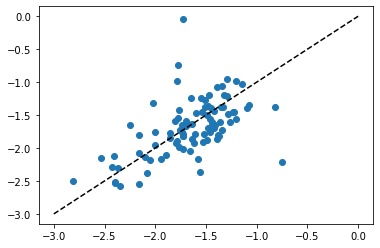

In [81]:
plt.plot([-3,0], [-3,0], linestyle = "--", color="k")
plt.scatter(df_master["feh_nsspp"], df_master["rrlfe_feh_retrieved"])
plt.show()

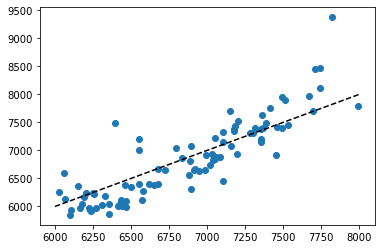

In [80]:
plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k")
plt.scatter(df_master["nsspp_teff"], df_master["rrlfe_teff_retrieved"])
plt.show()